In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from difflib import SequenceMatcher

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
novo = pd.read_csv('train.csv')
novo_update = pd.read_csv('train_updates_20220929.csv')

novo_update_seq_id = novo_update.pop('seq_id')
novo_update.dropna(how='all', inplace=True)
novo_update_ready = novo_update.merge(novo_update_seq_id, how='left', left_index=True, right_index=True)

novo.update(novo_update_ready)
novo['seq_id'] = novo['seq_id'].astype(int)
novo.set_index('seq_id', inplace=True);

novo.isna().sum()

/tmp/ipykernel_50135/1118226498.py:8: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  novo.update(novo_update_ready)


protein_sequence       0
pH                   286
data_source         3347
tm                     0
dtype: int64

In [3]:
novo = novo.dropna(subset = 'pH')
novo.isna().sum()

protein_sequence       0
pH                     0
data_source         3335
tm                     0
dtype: int64

In [4]:
novo['pH'][novo['pH'] > 14].count()

28

In [5]:
novo['pH'][novo['pH'] > 14].unique()

array([48.4, 49. , 55.6, 64.9, 39. , 53.4])

In [6]:
#The above numbers look like they were shifted by a decimal. I will correct that.

novo['pH'][novo['pH'] > 14] = novo['pH'][novo['pH'] > 14] * 0.1
novo['pH'] = novo['pH'].round(1)

/tmp/ipykernel_50135/1840823251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['pH'][novo['pH'] > 14] = novo['pH'][novo['pH'] > 14] * 0.1


<AxesSubplot:xlabel='pH', ylabel='Count'>

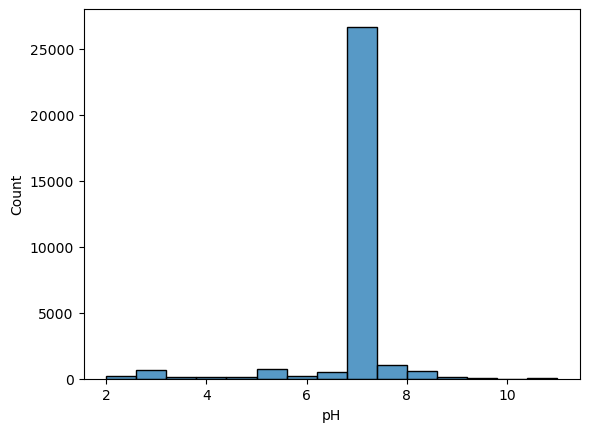

In [7]:
sns.histplot(novo.pH, bins = 15)

<AxesSubplot:xlabel='tm', ylabel='Count'>

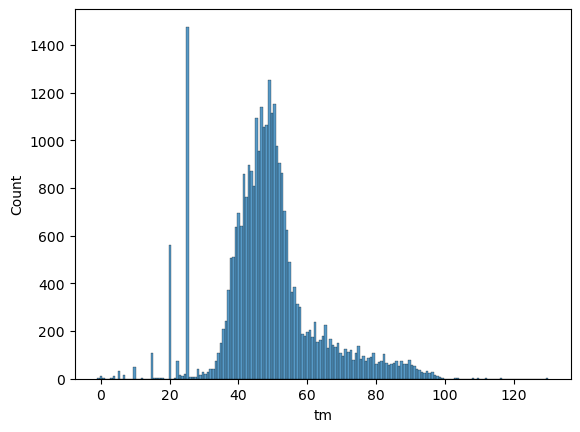

In [8]:
sns.histplot(novo.tm)

In [9]:
novo[novo['tm'] == 130]

,protein_sequence,pH,data_source,tm
seq_id,,,,
14318,MKKFLLVAVVGLAGITFANEQLAKQKGCMACHDLKAKKVGPAFADV...,7.0,10.1021/bi061164g,130.0


In [24]:
len(novo)

31104

In [27]:
for value in range(0, len(novo)):
    comparison_score = SequenceMatcher(a = novo['protein_sequence'].iloc[value], b = novo['protein_sequence'].iloc[14318]).ratio()
    novo['comp_score'].iloc[value] = comparison_score


/tmp/ipykernel_50135/4277552887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  novo['comp_score'].iloc[value] = comparison_score


Percent Done: 0.0
Percent Done: 0.0032150205761316874
Percent Done: 0.006430041152263375
Percent Done: 0.009645061728395061
Percent Done: 0.01286008230452675
Percent Done: 0.016075102880658436
Percent Done: 0.019290123456790122
Percent Done: 0.022505144032921812
Percent Done: 0.0257201646090535
Percent Done: 0.028935185185185182
Percent Done: 0.03215020576131687
Percent Done: 0.03536522633744856
Percent Done: 0.038580246913580245
Percent Done: 0.041795267489711935
Percent Done: 0.045010288065843625
Percent Done: 0.04822530864197531
Percent Done: 0.051440329218107
Percent Done: 0.05465534979423868
Percent Done: 0.057870370370370364
Percent Done: 0.06108539094650206
Percent Done: 0.06430041152263374
Percent Done: 0.06751543209876543
Percent Done: 0.07073045267489712
Percent Done: 0.0739454732510288
Percent Done: 0.07716049382716049
Percent Done: 0.08037551440329219
Percent Done: 0.08359053497942387
Percent Done: 0.08680555555555555
Percent Done: 0.09002057613168725
Percent Done: 0.093235

,protein_sequence,pH,data_source,tm,comp_score
seq_id,,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,0.148297
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,0.153153
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,0.128244
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,0.080378
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,0.045991


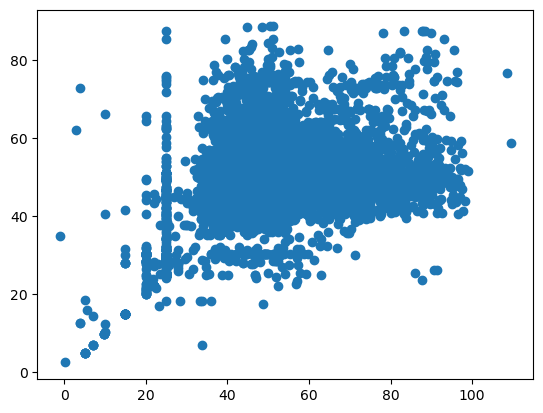

In [39]:
X = novo[["pH", "comp_score"]]
y = novo['tm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.show()

In [43]:
test_set = pd.read_csv('test.csv')

test_set['comp_score'] = 0

for value in range(0, len(test_set)):
    comparison_score = SequenceMatcher(a = test_set['protein_sequence'].iloc[value], b = novo['protein_sequence'].iloc[14318]).ratio()
    test_set['comp_score'].iloc[value] = comparison_score

test_set.head()

testX = test_set[['pH', 'comp_score']]

y_pred = regressor.predict(testX)


/tmp/ipykernel_50135/163556605.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['comp_score'].iloc[value] = comparison_score


In [44]:
Test_seq = test_set['seq_id']
submission = pd.DataFrame()
submission['seq_id'] = Test_seq
submission['tm'] = y_pred
submission.head()
submission.to_csv('submission.csv', index=False)